In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

red_wine = pd.read_csv('https://raw.githubusercontent.com/Jeff-z3/especializacion_udea/main/entrega/Red.csv')
rose_wine = pd.read_csv('https://raw.githubusercontent.com/Jeff-z3/especializacion_udea/main/entrega/Rose.csv')
sparkling_wine = pd.read_csv('https://raw.githubusercontent.com/Jeff-z3/especializacion_udea/main/entrega/Sparkling.csv')
white_wine = pd.read_csv('https://raw.githubusercontent.com/Jeff-z3/especializacion_udea/main/entrega/White.csv')

In [2]:
red_wine['kind'] = 'Red'
rose_wine['kind'] = 'Rose'
sparkling_wine['kind'] = 'Sparkling'
white_wine['kind'] = 'White'
wines_data = pd.concat([rose_wine, red_wine, sparkling_wine, white_wine], ignore_index=True)

In [3]:
cols_with_nan=[col for col in wines_data.columns if (wines_data[col].isnull().sum()>0)]
for column in cols_with_nan:
    print(column, "tiene", wines_data[column].isnull().mean()*100,"% de valores faltantes")
wines_data.isna().sum()
wines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   kind             13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB


In [4]:
top_countries_quality = wines_data.groupby(['Country']).agg('mean').sort_values(by = 'Rating', ascending=False)
top_countries_price = wines_data.groupby(['Country']).agg('mean').sort_values(by = 'Price', ascending=False)
top_countries_count = wines_data.groupby(['Country']).agg('count').sort_values(by = 'Price', ascending=False)
top_countries_quality

,Rating,NumberOfRatings,Price
Country,,,
Moldova,4.175000,519.437500,24.027500
Lebanon,4.137500,2135.062500,36.887500
Croatia,4.083333,91.333333,21.966667
Czech Republic,4.050000,100.500000,25.400000
United Kingdom,4.033333,177.000000,57.770000
Georgia,3.976923,122.769231,19.613077
France,3.932829,536.462165,55.539331
United States,3.888302,793.883019,43.719170
Italy,3.880225,396.338607,29.264825


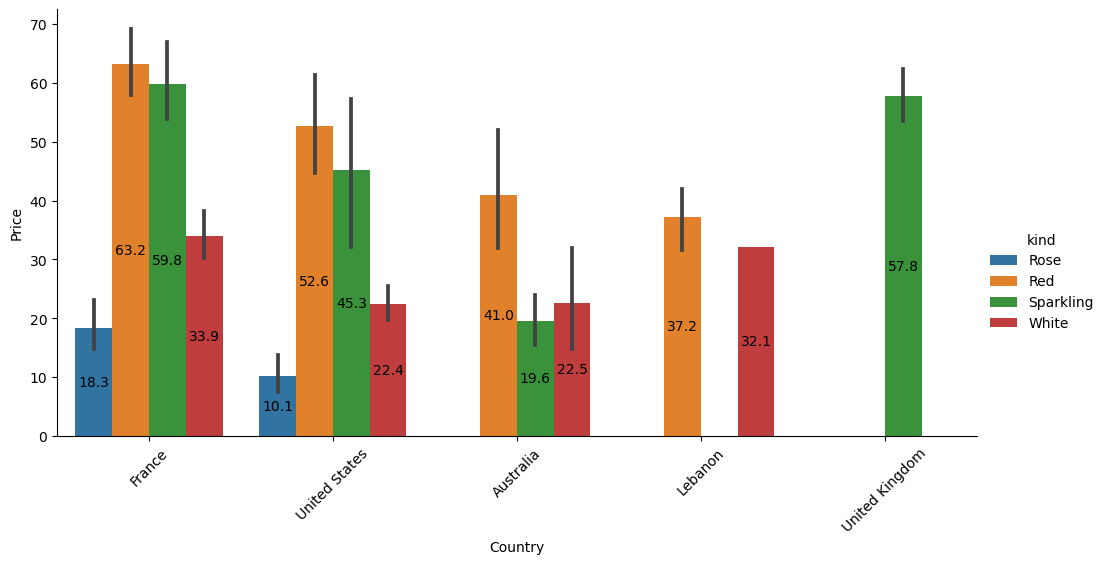

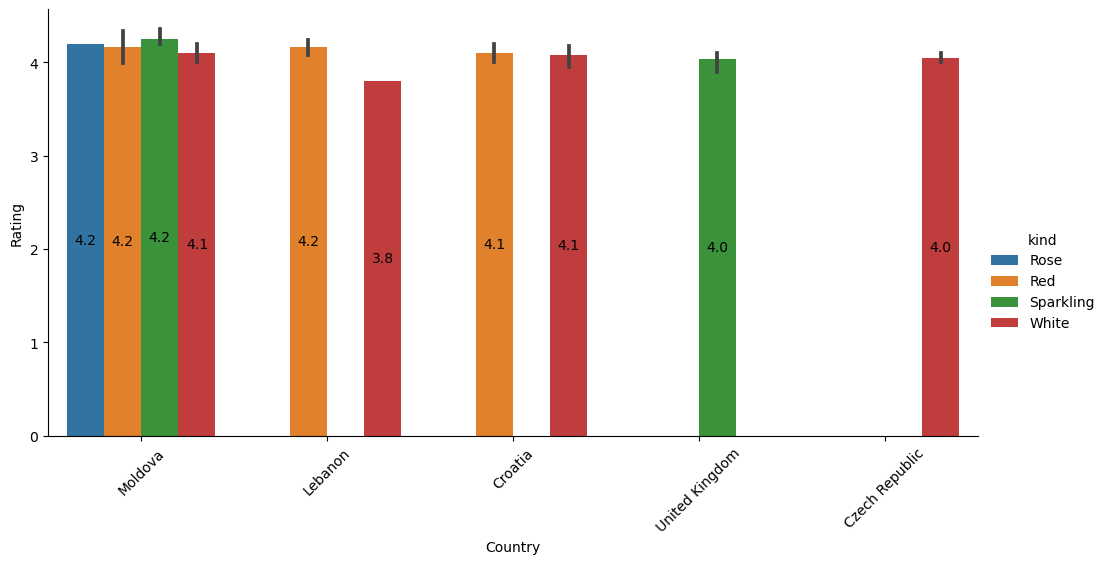

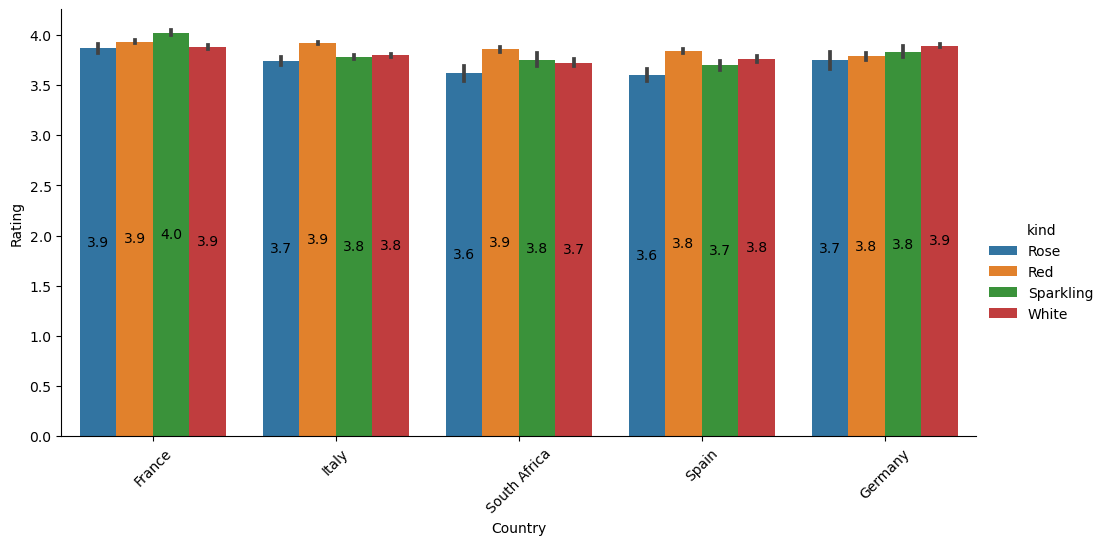

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.plotting import scatter_matrix

def costum_graph(g):
    ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

    # iterate through the axes containers
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

price_wine = sns.catplot(data = wines_data[wines_data['Country'].isin(top_countries_price.index[0:5])], x="Country", 
            y="Price", hue="kind", kind= 'bar', height=5, aspect=2).set_xticklabels(rotation=45)

quality_wine = sns.catplot(data = wines_data[wines_data['Country'].isin(top_countries_quality.index[0:5])], x="Country", 
            y="Rating", hue="kind", kind= 'bar', height=5, aspect=2).set_xticklabels(rotation=45)

count_wine = sns.catplot(data = wines_data[wines_data['Country'].isin(top_countries_count.index[0:5])], x="Country", 
            y="Rating", hue="kind", kind= 'bar', height=5, aspect=2).set_xticklabels(rotation=45)

costum_graph(price_wine)
costum_graph(quality_wine)
costum_graph(count_wine)

#sns.pairplot(wines_data[wines_data['Country'].isin(top_countries_quality.index[0:5])], hue = "kind", vars = ["Rating","Price"])


plt.show()

In [6]:
anova_cat=ols('Rating ~ Price', data=wines_data[wines_data['Country'].isin(top_countries_price.index[0:5])]).fit()
sm.stats.anova_lm(anova_cat)

,df,sum_sq,mean_sq,F,PR(>F)
Price,1.0,94.776332,94.776332,1391.383955,4.184868e-264
Residual,4301.0,292.969459,0.068117,NaN,NaN


In [7]:
anova_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     1391.
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          4.18e-264
Time:                        21:54:03   Log-Likelihood:                -324.61
No. Observations:                4303   AIC:                             653.2
Df Residuals:                    4301   BIC:                             666.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8437      0.004    865.108      0.000       3.835       3.852
Price          0.0014   3.76e-05     37.301      0.000       0.001       0.001
==============================================================================
Omnibus:                     1617.673   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28979.740
Skew:                          -1.325   Prob(JB):                         0.00
Kurtosis:                      15.434   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

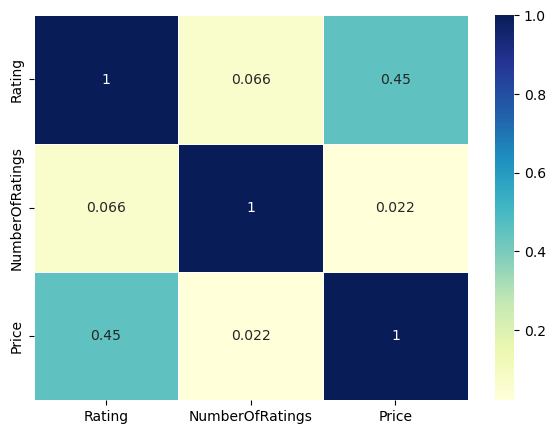

In [8]:
corrs = wines_data[['Rating','NumberOfRatings','Price']].corr() #Heatmap for numetrical columns
fig, ax = plt.subplots(figsize=(7,5))        

sns.heatmap(corrs,annot = True,ax=ax,linewidths=.6, cmap = 'YlGnBu')

In [9]:
corr_p = wines_data.corr()
corr_k = wines_data.corr(method = "kendall")
corr_s = wines_data.corr(method = "spearman")

corr_s

,Rating,NumberOfRatings,Price
Rating,1.000000,0.097170,0.718679
NumberOfRatings,0.097170,1.000000,0.063972
Price,0.718679,0.063972,1.000000


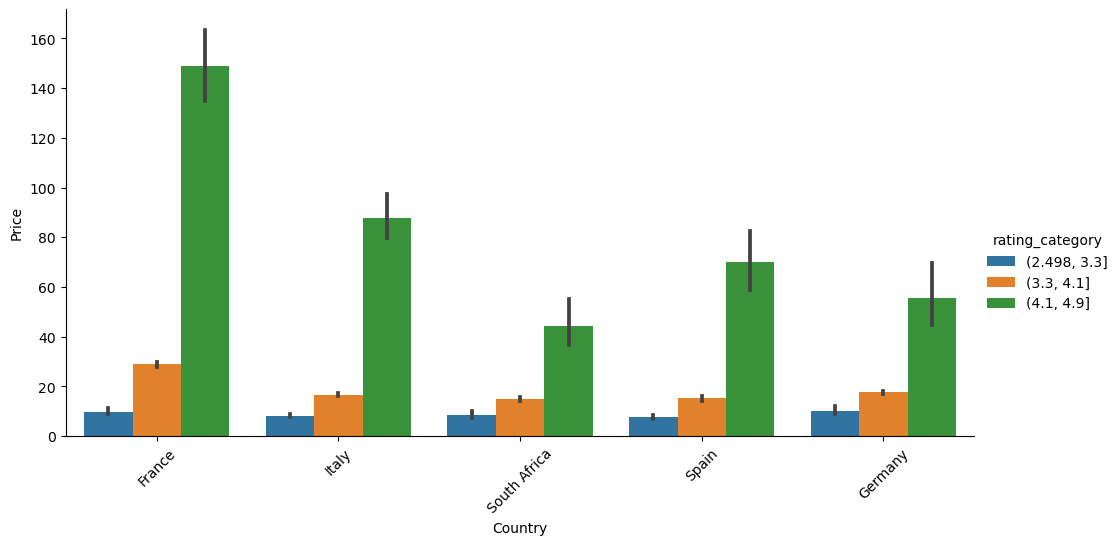

In [10]:
wines_data['rating_category'] = pd.cut(wines_data[wines_data['Country'].isin(top_countries_count.index[0:5])]['Rating'], bins=3)

sns.catplot(data = wines_data[wines_data['Country'].isin(top_countries_count.index[0:5])], x="Country", 
            y="Price", hue="rating_category", kind= 'bar', height=5, aspect=2).set_xticklabels(rotation=45)